In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('breast_cancer.csv',index_col='id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


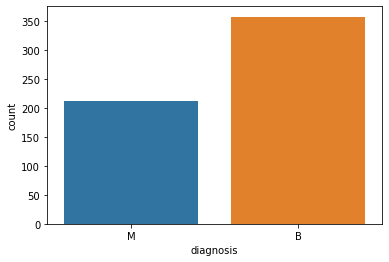

In [4]:
#countplot for classification
sns.countplot(data['diagnosis'],label="Count")

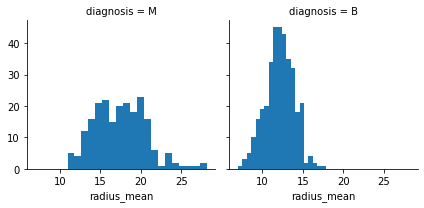

In [5]:
grid = sns.FacetGrid(data, col='diagnosis')
grid.map(plt.hist, 'radius_mean', bins=20)
#grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'Age', alpha=.5, bins=20)
#grid.add_legend();

# Violin plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

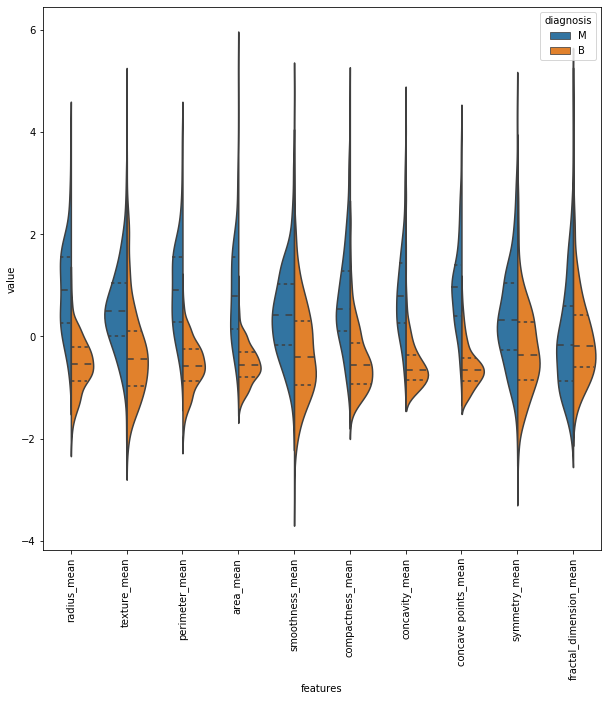

In [6]:
#violin plot for binary classification
#target variable
y=data.diagnosis
#dropping categorical columns and target column
data=data.drop(['Unnamed: 32','diagnosis'],axis = 1 )

data_s_2 = (data - data.mean()) / (data.std())              # standardization
data_n_2= (data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0,skipna=True))  #normalization
#taking first 10 columns to see the violin plot with the target variable
data_con = pd.concat([y,data_s_2.iloc[:,0:10]],axis=1)          
data_mel = pd.melt(data_con,id_vars="diagnosis",var_name="features",value_name='value')
#to increase fig size
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_mel,split=True, inner="quart")
#to have the x variable visible
plt.xticks(rotation=90)

#https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization#Data-Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

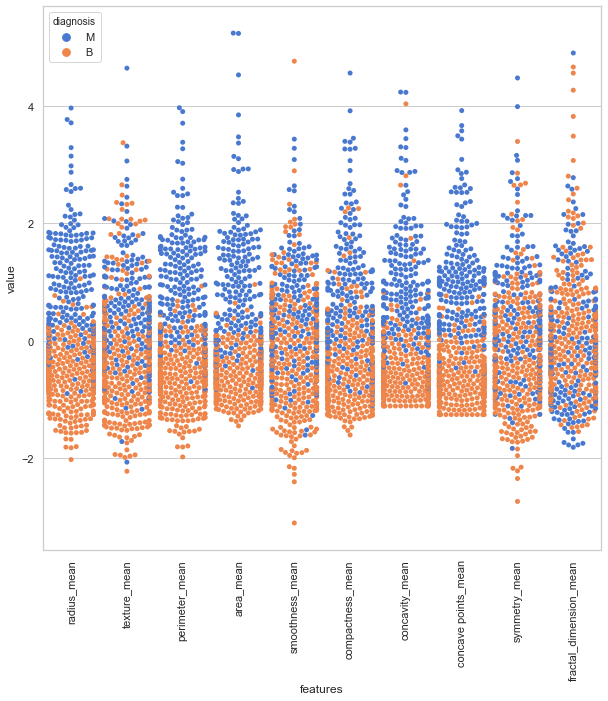

In [7]:
#swarm plot
#using all data steps of violin plot and then
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_mel)
plt.xticks(rotation=90)

In [8]:
#Anomaly Detection Using One-Class SVM
from sklearn import svm
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.02)
clf.fit(data)
pred = clf.predict(data)
# inliers are labeled 1, outliers are labeled -1
normal = data[pred == 1].values
abnormal = data[pred == -1].values
#https://www.kaggle.com/rishitdagli/beginners-anomaly-detection

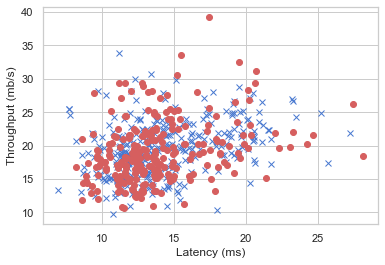

In [9]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [10]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
#chi2 for classification task
select_feature = SelectKBest(chi2, k=10).fit(data, y)
print('Score list:', select_feature.scores_)
print('Feature list:', data.columns)

Score list: [2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

# PCA

Text(0, 0.5, 'explained_variance_ratio')

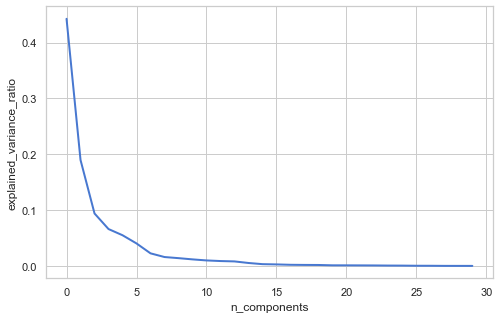

In [11]:
#pca
#standardization
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler().fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)

plt.figure(1, figsize=(8, 5))
plt.clf()
#plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
#plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')

Text(0, 0.5, 'PCA2')

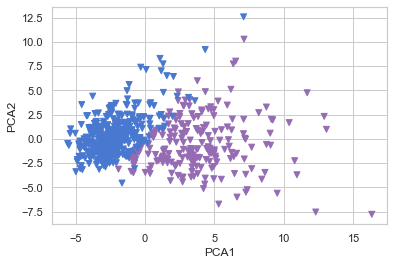

In [12]:
x_pca=pca.transform(scaled_data)
plt.scatter(x_pca[:,0],x_pca[:,1],marker='v',c=y,cmap='plasma')
plt.xlabel("PCA1")
plt.ylabel('PCA2')

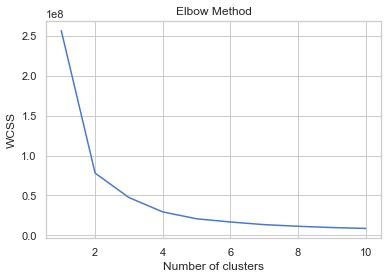

In [13]:
#Kmeans
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3,random_state=123)

# SVC

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
#default
#clf_svm=SVC(C=1.0,kernel='rbf',gamma='scale')
from sklearn.model_selection import KFold
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}  
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.01,0.001,0.0001]}
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,scoring='accuracy',cv=folds,verbose=2,return_train_score=True)
grid.fit(xtrain,ytrain)
print(grid.best_estimator_)
grid_predictions = grid.predict(xtest)
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest,grid_predictions))

#https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.1, gamma=0.0001, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .............................. C=0.1, gamma=0.0001, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .............................. C=0.1, gamma=0.0001, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .............................. C=0.1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished


The best test score is 0.9321202531645569 corresponding to hyperparameters {'C': 10, 'gamma': 0.0001}


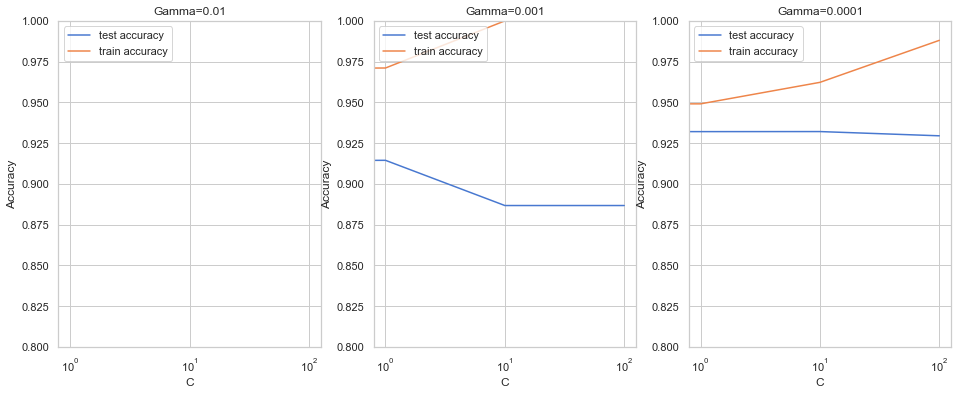

In [17]:
#scores of GridSearchCV
cv_results=grid.cv_results_
cv_results=pd.DataFrame(cv_results)
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma1 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma1["param_C"], gamma1["mean_test_score"])
plt.plot(gamma1["param_C"], gamma1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma2 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma2["param_C"], gamma2["mean_test_score"])
plt.plot(gamma2["param_C"], gamma2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma3 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma3["param_C"], gamma3["mean_test_score"])
plt.plot(gamma3["param_C"], gamma3["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# printing the optimal accuracy score and hyperparameters
best_score = grid.best_score_
best_hyperparams = grid.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

# Randomforest classifier

In [18]:
#randomforest classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=None,random_state=43)      
clr_rf = clf_rf.fit(xtrain,ytrain)
ypred=clf_rf.predict(xtest)
print('Accuracy is: ',accuracy_score(ytest,ypred))

Accuracy is:  0.9766081871345029


In [19]:
#feature importance with randomforest
clf_rf.feature_importances_
feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = data.columns,columns = [ 'y' ] ).sort_values( 'y', ascending = False )
feature_importances[:10] #top 10 important features

,y
concave points_worst,0.218938
perimeter_worst,0.130667
area_worst,0.116650
radius_mean,0.080509
concave points_mean,0.075716
radius_worst,0.061616
area_mean,0.060153
perimeter_se,0.035862
texture_mean,0.034111
perimeter_mean,0.019236


In [20]:
#Feature selection using randomforest
#cross validation using randomforest classifier to find the optimal features
from sklearn.feature_selection import RFECV

#The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_cv= RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_cv, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(xtrain, ytrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 18
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
       'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


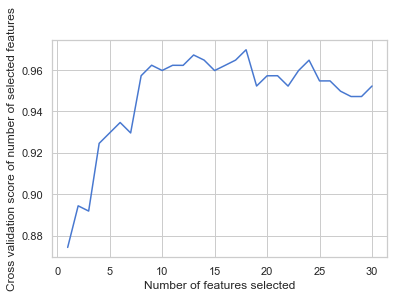

In [21]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
param_grid = {'max_depth': range(2, 20, 5)}
rf = RandomForestClassifier()
rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=n_folds,scoring='accuracy',return_train_score=True)
rf.fit(xtrain,ytrain)
print(rf.best_estimator_)
#scores of GridSearchCV
scores=rf.cv_results_
scores=pd.DataFrame(scores)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


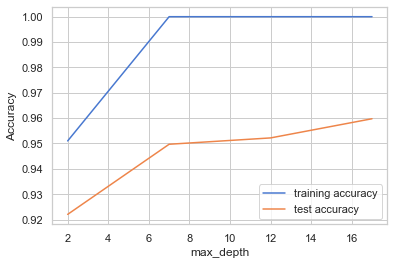

The best test score is 0.959746835443038 corresponding to hyperparameters {'max_depth': 17}


In [23]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# printing the optimal accuracy score and hyperparameters
best_score = rf.best_score_
best_hyperparams = rf.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [24]:
#have to run gridsearch for all hyperparameters like(max_depth) before running the below code for getting correct accuracy
#or giving random value and see the best score result if its the boundary range you have given, increase or decrease the range

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [17,18,19],
    'min_samples_leaf': [50, 80, 100],
    'min_samples_split': range(100, 300, 100),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 5]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   21.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [26]:
# printing the optimal accuracy score and hyperparameters
print('The best score is',grid_search.best_score_,'using',grid_search.best_params_)

The best score is 0.9220209614946456 using {'max_depth': 18, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


# XGBClassifier

In [29]:
import xgboost as xgb
#from sklearn.preprocessing import LabelEncoder
#y=LabelEncoder().fit_transform(y)  #labelencode in tis ex
dmatrix=xgb.DMatrix(data=data,label=y)
params={'objective':'binary:logistic','max_depth':4}
cv_results=xgb.cv(dtrain=dmatrix,params=params,nfold=3,num_boost_round=10,metrics='error',as_pandas=True)
print("Accuracy is :", (1-cv_results["test-error-mean"]).iloc[-1])

Accuracy is : 0.9437763333333333


# Classification metrics

In [30]:
#classification metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
#print('Accuracy is: ',accuracy_score(ytest,clf_rf.predict(xtest)))
print('Accuracy is: ',accuracy_score(ytest,ypred))
print('Precision is: ', recall_score(ytest,ypred,average='macro'))
print('Recall is: ',precision_score(ytest,ypred,average='macro'))
print('F1 score is: ',f1_score(ytest,ypred,average='macro'))
report=classification_report(ytest,ypred)
print(report)

Accuracy is:  0.9766081871345029
Precision is:  0.9755853797829812
Recall is:  0.9755853797829812
F1 score is:  0.9755853797829812
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       103
           M       0.97      0.97      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



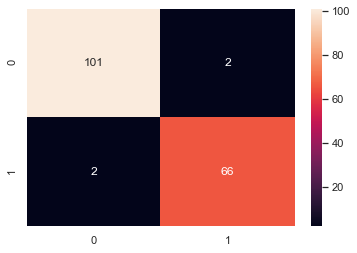

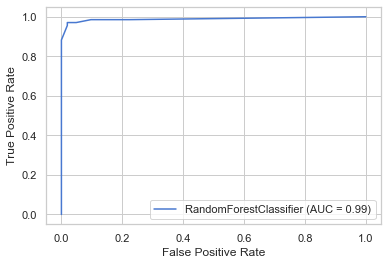

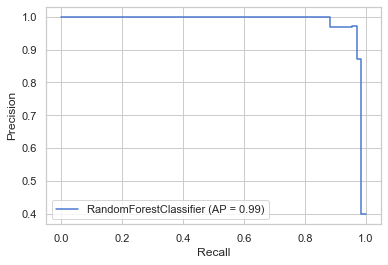

In [31]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
cm = confusion_matrix(ytest,clf_rf.predict(xtest))
sns.heatmap(cm,annot=True,fmt="d")
#plot_confusion_matrix(estimator=clf_rf,X=xtest,y_true=ytest)
plot_roc_curve(estimator=clf_rf,X=xtest,y=ytest)
plot_precision_recall_curve(estimator=clf_rf,X=xtest,y=ytest)